In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

### Local Linear Trend

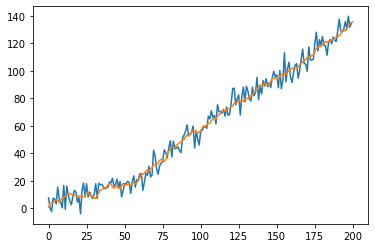

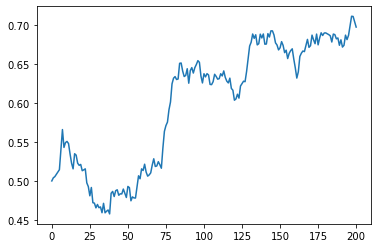

In [204]:
T = 200

level = np.zeros(T+1)
slope= np.zeros(T+1)
y = np.zeros(T)

init_slope = .5
init_level = 1 

obs_scale = 5
slope_scale = .01
level_v_scale = 1

slope[0] = init_slope
level[0] = init_level

for t in range(T):
    level[t+1] = level[t] + slope[t] + np.random.normal(0, scale=level_v_scale)
    slope[t+1] = slope[t] + np.random.normal(0, scale=slope_scale)
    y[t] = level[t] + np.random.normal(loc=0, scale=obs_scale)

fig, ax = plt.subplots()
plt.plot(y, alpha=1)
plt.plot(level)
fig, ax = plt.subplots()
plt.plot(slope)

### Static Intervention

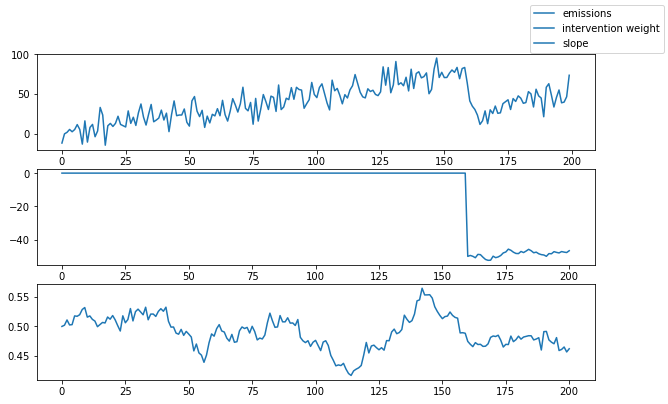

In [203]:
T = 200

intervention_length = int(T*.2)
intervention_start = T - intervention_length

# Create States + Obs 
level = np.zeros(T+1)
slope = np.zeros(T+1)
y = np.zeros(T)
intervention_weights = np.zeros(T+1)

init_slope = .5 
init_level = 1 
init_weight = -20

# Set Initial Values
slope[0] = init_slope
level[0] = init_level
intervention_weights[intervention_start] = -50

# Provide Scales
obs_scale = 10
slope_scale = .01
level_v_scale = .01
intervention_scale = 1

for t in range(T):
    level[t+1] = level[t] + slope[t] + np.random.normal(0, scale=level_v_scale)
    slope[t+1] = slope[t] + np.random.normal(0, scale=slope_scale)
    if t >= intervention_start:
        y[t] = level[t] + intervention_weights[t] + np.random.normal(loc=0, scale=obs_scale)
        intervention_weights[t+1] = intervention_weights[t] + np.random.normal(loc=0, scale=intervention_scale) 
    else:
        y[t] = level[t] + np.random.normal(loc=0, scale=obs_scale)

fig, ax = plt.subplots(3, figsize=(10,6))
ax[0].plot(y, alpha=1, label="emissions")
ax[1].plot(intervention_weights, alpha=1, label="intervention weight")
ax[2].plot(slope, label="slope")
fig.legend()

### Rising Intervention

### Setting Intervention Effect as % of Y

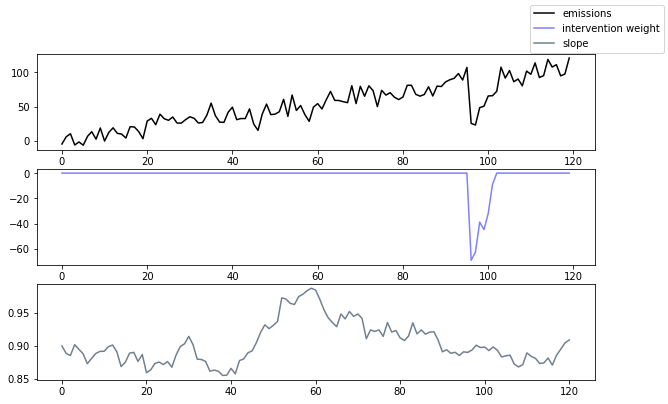

In [202]:
T = 120

intervention_length = 6
intervention_start = int(T*.8)

weight_multiplier = .9

# Create States + Obs 
level = np.zeros(T+1)
slope = np.zeros(T+1)
y = np.zeros(T)
intervention_weights = np.zeros(T)

# Init values
init_slope = .9
init_level = 1 

# Set Initial Values
slope[0] = init_slope
level[0] = init_level

# Error Term Scales
obs_scale = 10
slope_scale = .01
level_v_scale = .01
intervention_scale = 10

### Simulate without intervention Effect
for t in range(T):
    level[t+1] = level[t] + slope[t] + np.random.normal(0, scale=level_v_scale)
    slope[t+1] = slope[t] + np.random.normal(0, scale=slope_scale)
    y[t] = level[t] + np.random.normal(loc=0, scale=obs_scale)

### Set intervention effect as a percentage of the value at t=intervention_start
init_weight = y[intervention_start] * -weight_multiplier
step = abs(init_weight / (intervention_length))
intervention_weights[intervention_start:intervention_start+intervention_length] = np.arange(start=init_weight, stop=0, step=step)
intervention_weights

### Add weights back to observed y values
for t in range(intervention_start,intervention_start+intervention_length):
    intervention_weights[t] = intervention_weights[t] + np.random.normal(loc=0, scale=intervention_scale)
    y[t] = level[t] + intervention_weights[t] + np.random.normal(loc=0, scale=obs_scale)

### Plot
fig, ax = plt.subplots(3, figsize=(10,6))
ax[0].plot(y, alpha=1, label="emissions", color='k')
ax[1].plot(intervention_weights, color='b', alpha=.5, label="intervention weight")
ax[2].plot(slope, label="slope", color='slategrey')
fig.legend()